In [6]:
import matplotlib.pyplot as plt
import os
height = 10
width = height*0.6
plt.rcParams["figure.figsize"] = (height,width)
import numpy as np
plt.style.use('seaborn-colorblind')


target_directory = "../trained-models/BranchedResNet18/run9/metrics/"

try:
    os.mkdir(target_directory + 'figures/')
    print('Figure Folder Created..')
except FileExistsError:
    print('Figure Folder Exists..')
        

Figure Folder Exists..


In [2]:
branch_train_accuracies=np.load(target_directory+"branch-train-accuracies-BranchedResNet18.npy")
branch_val_accuracies=np.load(target_directory+"branch-val-accuracies-BranchedResNet18.npy")
branch_train_losses=np.load(target_directory+"branch-train-losses-BranchedResNet18.npy")
branch_val_losses=np.load(target_directory+"branch-val-losses-BranchedResNet18.npy")

train_losses=np.load(target_directory+"train-losses-BranchedResNet18.npy")
val_losses=np.load(target_directory+"val-losses-BranchedResNet18.npy")
checkpoint_metrics=np.load(target_directory+"checkpoint-metrics-BranchedResNet18.npy")
branch_weights=np.load(target_directory+"branch-weights-BranchedResNet18.npy")

In [3]:
print(val_losses.shape)
print(train_losses.shape)

print(branch_train_accuracies.shape)
print(branch_val_accuracies.shape)
print(branch_train_losses.shape)
print(branch_val_losses.shape)

(3, 200)
(3, 200)
(3, 4, 200)
(3, 4, 200)
(3, 4, 200)
(3, 4, 200)


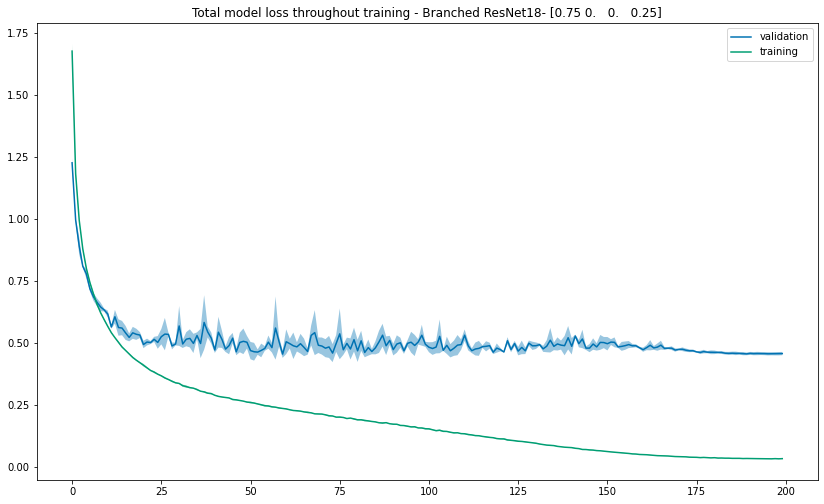

In [4]:
plt.title("Total model loss throughout training - Branched ResNet18- " + str(branch_weights) )
plt.plot(np.arange(0,val_losses.shape[1]), np.mean(val_losses,axis=0),label="validation")
plt.fill_between(np.arange(0,val_losses.shape[1]), np.mean(val_losses,axis=0)+np.std(val_losses,axis=0), np.mean(val_losses,axis=0)-np.std(val_losses,axis=0),alpha=0.4)
plt.plot(np.arange(0,val_losses.shape[1]), np.mean(train_losses,axis=0),label="training")
plt.fill_between(np.arange(0,val_losses.shape[1]), np.mean(train_losses,axis=0)+np.std(train_losses,axis=0), np.mean(train_losses,axis=0)-np.std(train_losses,axis=0),alpha=0.4)
plt.legend()
plt.savefig('../trained-models/BranchedResNet18/run10/metrics/figures/total-model-loss.pdf', bbox_inches = 'tight')
plt.show()

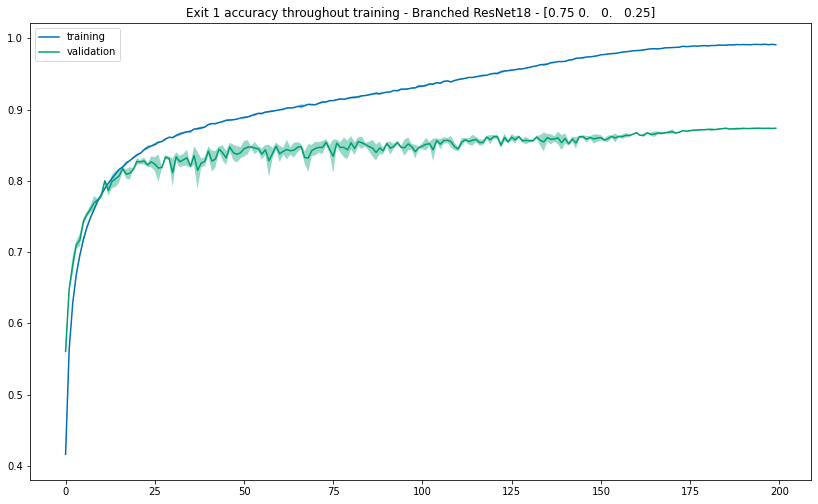

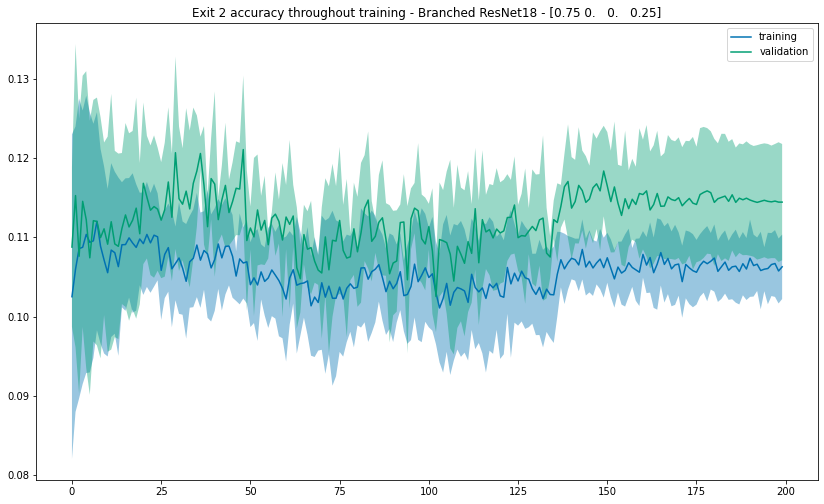

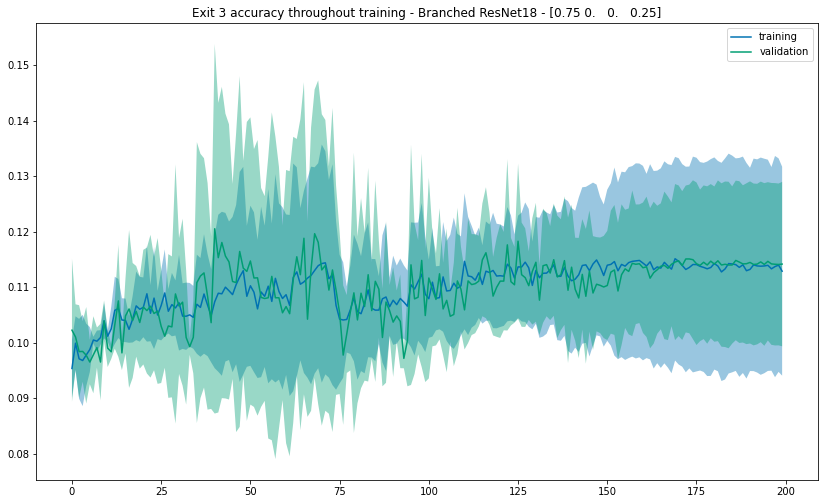

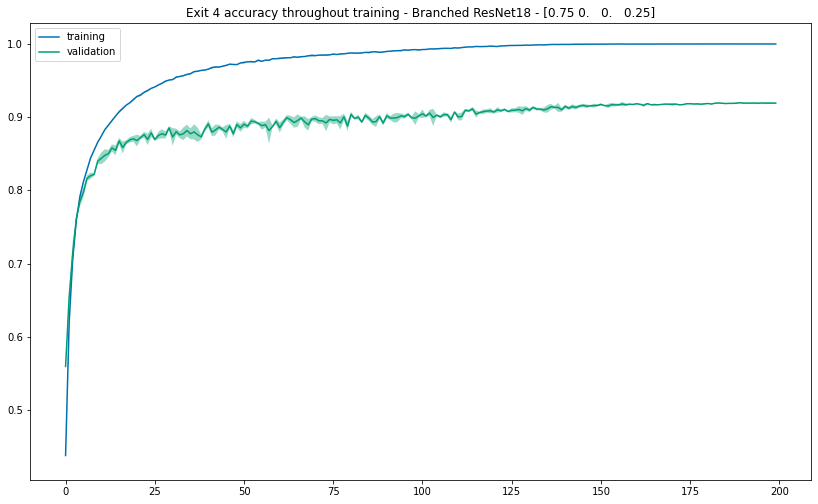

In [5]:
for exit in range(4):
    plt.title("Exit "+str(exit+1)+" accuracy throughout training - Branched ResNet18 - " + str(branch_weights) )
    plt.plot(np.arange(0,val_losses.shape[1]), np.mean(branch_train_accuracies[:,exit,:],axis=0),label='training')
    plt.fill_between(np.arange(0,val_losses.shape[1]), np.mean(branch_train_accuracies[:,exit,:],axis=0)+np.std(branch_train_accuracies[:,exit,:],axis=0), np.mean(branch_train_accuracies[:,exit,:],axis=0)-np.std(branch_train_accuracies[:,exit,:],axis=0),alpha=0.4)
    plt.plot(np.arange(0,val_losses.shape[1]), np.mean(branch_val_accuracies[:,exit,:],axis=0),label='validation')
    plt.fill_between(np.arange(0,val_losses.shape[1]), np.mean(branch_val_accuracies[:,exit,:],axis=0)+np.std(branch_val_accuracies[:,exit,:],axis=0), np.mean(branch_val_accuracies[:,exit,:],axis=0)-np.std(branch_val_accuracies[:,exit,:],axis=0),alpha=0.4)
    plt.legend()
    plt.savefig(target_directory+'figures/exit'+str(exit+1)+'-accuracies.pdf', bbox_inches = 'tight')
    plt.show()